In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import functions as f 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline



In [2]:
blue = sns.color_palette()[0]

In [3]:
df = pd.read_pickle('data/rent_regression_done.pkl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651885 entries, 0 to 2651884
Data columns (total 73 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   obid                              int64         
 1   mietekalt                         float64       
 2   nebenkosten                       float64       
 3   heizkosten                        float64       
 4   baujahr                           float64       
 5   letzte_modernisierung             float64       
 6   wohnflaeche                       float64       
 7   nutzflaeche                       float64       
 8   etage                             float64       
 9   anzahletagen                      float64       
 10  zimmeranzahl                      float64       
 11  schlafzimmer                      float64       
 12  badezimmer                        float64       
 13  ev_kennwert                       float64       
 14  laufzeittage      

In [44]:
columns = ['mietekalt', 'baujahr',
       'letzte_modernisierung', 'wohnflaeche', 'etage',
       'anzahletagen', 'zimmeranzahl', 'schlafzimmer', 'badezimmer',
       'ev_kennwert', 'aufzug', 'balkon',
       'einbaukueche', 'ev_wwenthalten', 'foerderung', 'gaestewc', 'garten',
       'heizkosten_in_wm_enthalten', 'keller', 'parkplatz', 'rollstuhlgerecht',
       'ausstattung', 'energieeffizienzklasse', 'energieausweistyp',
       'haustier_erlaubt', 'heizungsart', 'kategorie_Wohnung', 'objektzustand',
       'anbieter', 'rent_sqm',
       'Wärmezufuhr', 'Erdgas leicht', 'Erdgas schwer',
       'keine Information', 'Windenergie', 'Pellets', 'Solarenergie', 'Koks',
       'kombinierte erneuerbare Energie', 'Erdwärme', 'Bioenergie',
       'Wasserenergie', 'Nahwärme', 'Fernwärme', 'Holzschnitzel', 'Öl',
       'kombinierte regenerative Energie', 'Kohle',
       'kombinierte Fossilkraftstoffe', 'Gas', 'Holz', 'Heizdampf-Fernwärme',
       'thermische Umweltenergie', 'Flüssiggas', 'kombinierte Bio Energie',
       'Elektro']

In [45]:
clustering_df = df[columns]

In [46]:
X, _ = f.clean_data(clustering_df)

In [47]:
X.drop(columns=['letzte_modernisierung'], inplace=True)

### Principal Component Analysis 

In [48]:
from sklearn.preprocessing import Normalizer

In [49]:
normalizer = Normalizer()
normalized_values = normalizer.fit_transform(X)

In [50]:
normalized_values

array([[1.91539422e-01, 9.79306685e-01, 3.14321103e-02, ...,
        0.00000000e+00, 0.00000000e+00, 4.91126723e-04],
       [2.03321455e-01, 9.76922849e-01, 3.18455292e-02, ...,
        0.00000000e+00, 0.00000000e+00, 4.89931218e-04],
       [2.33530780e-01, 9.70125781e-01, 3.30835271e-02, ...,
        0.00000000e+00, 0.00000000e+00, 4.86522458e-04],
       ...,
       [6.54346851e-01, 7.54929310e-01, 4.00086361e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.64867857e-01, 7.45760113e-01, 4.06308135e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.73923085e-01, 7.36073770e-01, 3.21985474e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [23]:
%%time
from sklearn.decomposition import PCA

# One less as original feature number
N_COMPONENTS = clustering_df.shape[1] - 1


pca = PCA(n_components=N_COMPONENTS)
pca.fit(normalized_values)

print('explained_variance_ratio_ vector:', pca.explained_variance_ratio_)
print('explained_variance_ratio_ sum:', pca.explained_variance_ratio_.sum())



explained_variance_ratio_ vector: [6.25411021e-01 1.65809355e-01 1.02859445e-01 6.87331134e-02
 3.07712789e-02 5.29527450e-03 5.16383581e-04 1.67982257e-04
 7.52783566e-05 3.60686063e-05 3.43205276e-05 2.83755442e-05
 2.52082572e-05 2.04887671e-05 1.89328312e-05 1.70335889e-05
 1.56115288e-05 1.45550028e-05 1.38862814e-05 1.16352101e-05
 1.08138137e-05 1.02463314e-05 9.90537026e-06 9.74697133e-06
 9.20987144e-06 8.36625298e-06 7.32171244e-06 6.55236515e-06
 6.07550480e-06 5.23234717e-06 4.38273880e-06 3.78156406e-06
 3.65539570e-06 3.22396280e-06 2.67815822e-06 2.11450378e-06
 1.99650374e-06 1.80381868e-06 1.51899377e-06 1.43030388e-06
 1.38029866e-06 1.17175789e-06 1.09365588e-06 1.02850443e-06
 9.03728749e-07 8.25608609e-07 7.69646267e-07 7.45316256e-07
 7.35600974e-07 6.43282991e-07 5.23523058e-07 5.05042348e-07]
explained_variance_ratio_ sum: 0.9999956307382349
CPU times: user 1min 38s, sys: 50.4 s, total: 2min 28s
Wall time: 55 s


In [51]:
s = pd.DataFrame(pca.singular_values_)
v = pd.DataFrame(pca.components_)

In [52]:
f.explained_variance(s, 4)

0.9628171413331621

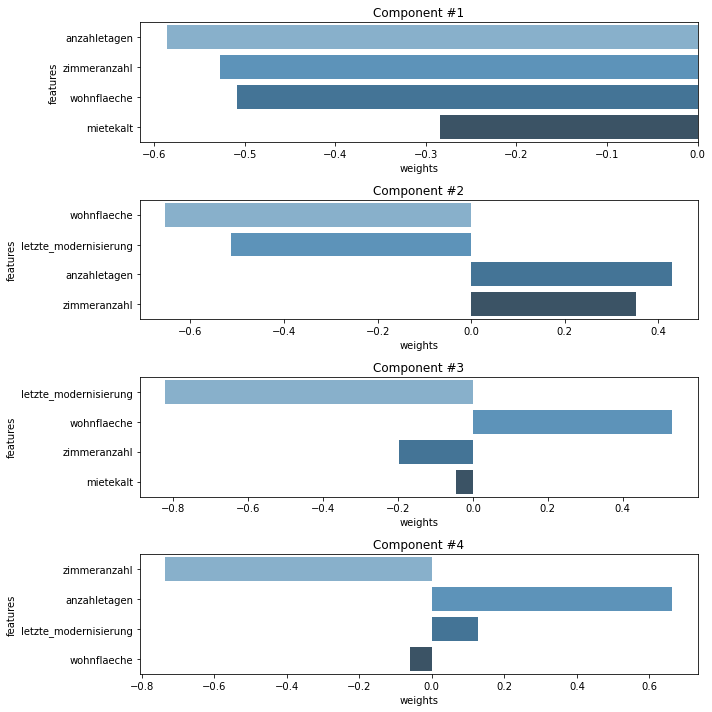

In [53]:
figure = plt.figure(figsize=(10,10))

for i in range(4):
    plt.subplot(4,1,i+1)
    f.display_components(v, clustering_df.columns, i, n_weights=4)
    plt.title('Component #{}'.format(i+1))
figure.tight_layout()

    

## Setup K-Means
Create K-Means analysis to find groups in customers based only on customer features

### Create input data based on PCA analysis
Use the `pca.transform()` function to create input data for the K-Means analysis.

In [54]:
%%time
# Create input data from PCA Analysis
pca_transformed = pca.fit_transform(normalized_values)

pca_transformed = pd.DataFrame(pca_transformed)
pca_transformed = pca_transformed.iloc[:,:4]
PCA_list=['c_1', 'c_2', 'c_3', 'c_4']
pca_transformed.columns=PCA_list

pca_transformed.head()



CPU times: user 1min 39s, sys: 51.3 s, total: 2min 30s
Wall time: 56.8 s


,c_1,c_2,c_3,c_4
0,-0.097502,-0.042463,-0.000895,-0.007908
1,-0.085692,-0.041872,-0.000927,-0.007647
2,-0.055152,-0.040276,-0.001013,-0.006968
3,-0.055152,-0.040276,-0.001013,-0.006968
4,-0.097411,-0.042420,-0.000840,-0.007912


In [55]:
%%time
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


# Do a loop over different k's to find the optimum
inertias = []
distortions = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i).fit(pca_transformed)
    cluster_centers = kmeans.cluster_centers_
    inertias.append(kmeans.inertia_)
    
    distortions.append(sum(np.min(cdist(pca_transformed, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / pca_transformed.shape[0])
                                        
    inertias.append(kmeans.inertia_)
    

CPU times: user 6min 8s, sys: 1min 12s, total: 7min 20s
Wall time: 1min 6s


In [56]:
distortions

[0.1288953417692916,
 0.08306795734038155,
 0.0660620145733061,
 0.058320760269333034,
 0.05403495636804407,
 0.04901145994238172]

<AxesSubplot:>

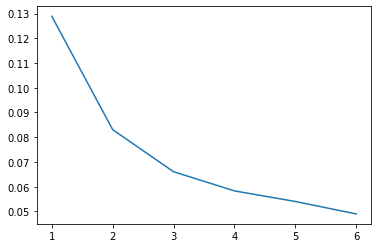

In [57]:
sns.lineplot(x=range(1,7), y=distortions)

In [58]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5).fit(pca_transformed)
labels = kmeans.labels_

CPU times: user 1min 16s, sys: 15.3 s, total: 1min 31s
Wall time: 13.8 s


In [59]:
cluster_df = pd.DataFrame(kmeans.cluster_centers_, columns=pca_transformed.columns)


Text(0.5, 1.0, 'Attribute Value by Centroid')

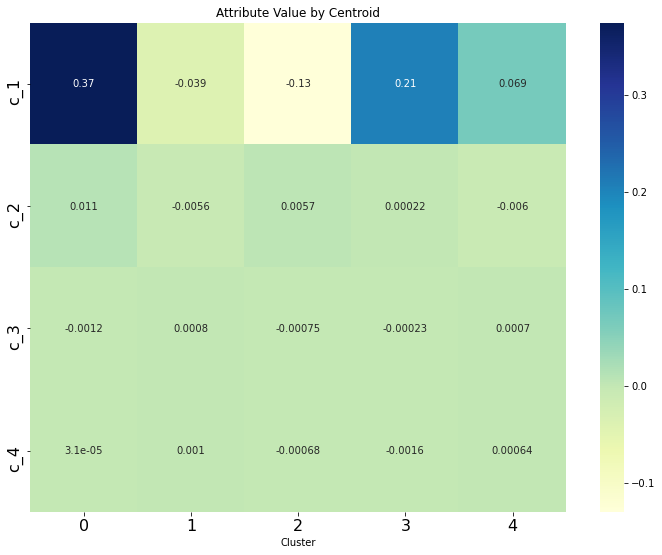

In [60]:
plt.figure(figsize = (12,9))
ax = sns.heatmap(cluster_df.T, cmap = 'YlGnBu', annot=True)
ax.set_xlabel("Cluster")
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
ax.set_title("Attribute Value by Centroid")



In [126]:
df.loc[:, 'label'] = labels

In [128]:
ticks = [0, 3, 4, 1, 2]
label_mapping = {0:'very high priced', 3:'high priced', 4:'normal priced', 1:'low priced', 2:'very low priced'}
df.label = df.label.map(label_mapping)

In [129]:

city_count = df.groupby(['label', ]).City.value_counts().reset_index(name='city_counts')
#city_count = city_count.pivot(index='City', columns='label', values='city_counts')

In [130]:
df.anzahletagen

,label,City,city_counts
0,high priced,Berlin,68159
1,high priced,München,49611
2,high priced,Frankfurt,41223
3,high priced,Hamburg,28956
4,high priced,Düsseldorf,27782
...,...,...,...
70,very low priced,Köln,37102
71,very low priced,Nürnberg,30945
72,very low priced,Frankfurt,21914
73,very low priced,Stuttgart,12177


In [203]:
city_count = df.groupby(['City', 'year']).label.value_counts(normalize=True).reset_index(name='label_ratio')
wohnflaeche = df.groupby(['City', 'year', 'label']).wohnflaeche.mean().reset_index(name='wohnflaeche_mean')
baujahr = df.groupby(['City', 'year', 'label']).baujahr.mean().reset_index(name='baujahr_mean')
rent_sqm = df.groupby(['City', 'year', 'label']).rent_sqm.mean().reset_index(name='rent_sqm_mean')
miete_mean = df.groupby(['City', 'year', 'label']).mietekalt.mean().reset_index(name='mietekalt_mean')
laufzeittage = df.groupby(['City', 'year', 'label']).laufzeittage.mean().reset_index(name='laufzeittage_mean')
anzahletagen = df.groupby(['City', 'year', 'label']).anzahletagen.mean().reset_index(name='anzahletagen_mean')
zimmeranzahl = df.groupby(['City', 'year', 'label']).zimmeranzahl.mean().reset_index(name='zimmeranzahl_mean')









In [174]:
df.groupby(['City', 'year', 'label']).ausstattung.value_counts().reset_index(name='ausstattung_count')

,City,year,label,ausstattung,ausstattung_count
0,Berlin,2007,high priced,Gehoben,18
1,Berlin,2007,high priced,Normal,7
2,Berlin,2007,high priced,Luxus,2
3,Berlin,2007,low priced,Normal,129
4,Berlin,2007,low priced,Gehoben,119
...,...,...,...,...,...
3436,Stuttgart,2019,very high priced,Luxus,173
3437,Stuttgart,2019,very high priced,Einfach,1
3438,Stuttgart,2019,very low priced,Normal,78
3439,Stuttgart,2019,very low priced,Einfach,14


In [204]:
summary =miete_mean.merge(wohnflaeche, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(baujahr, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(rent_sqm, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(laufzeittage, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(anzahletagen, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(zimmeranzahl, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(city_count, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label'])

In [205]:
summary

,City,year,label,mietekalt_mean,wohnflaeche_mean,baujahr_mean,rent_sqm_mean,laufzeittage_mean,anzahletagen_mean,zimmeranzahl_mean,label_ratio
0,Berlin,2007,high priced,1038.719409,122.749451,1942.850525,8.611152,34.882601,-30.050676,3.597128,0.023754
1,Berlin,2007,low priced,495.304425,84.827695,1950.193002,6.023987,37.428379,-31.517261,2.887434,0.252804
2,Berlin,2007,normal priced,725.293180,104.759380,1943.819006,7.138539,35.244957,-27.439721,3.321326,0.083539
3,Berlin,2007,very high priced,1383.848407,134.177967,1945.309543,10.404585,40.175824,-30.494505,3.796703,0.003651
4,Berlin,2007,very low priced,305.871845,59.923220,1950.797217,5.246541,32.301823,-45.483194,2.133636,0.636252
...,...,...,...,...,...,...,...,...,...,...,...
965,Stuttgart,2019,high priced,1098.714431,74.748174,1962.402935,15.349910,23.286835,-24.063866,2.772269,0.255621
966,Stuttgart,2019,low priced,534.735623,39.272910,1959.408782,15.063898,29.770654,-26.475956,1.429100,0.116139
967,Stuttgart,2019,normal priced,772.495645,55.993863,1962.245445,14.899830,18.169402,-30.673505,2.160903,0.244308
968,Stuttgart,2019,very high priced,1694.641055,93.425580,1961.132995,19.020424,23.522382,-54.011990,3.154676,0.358299


<AxesSubplot:xlabel='mietekalt_mean', ylabel='wohnflaeche_mean'>

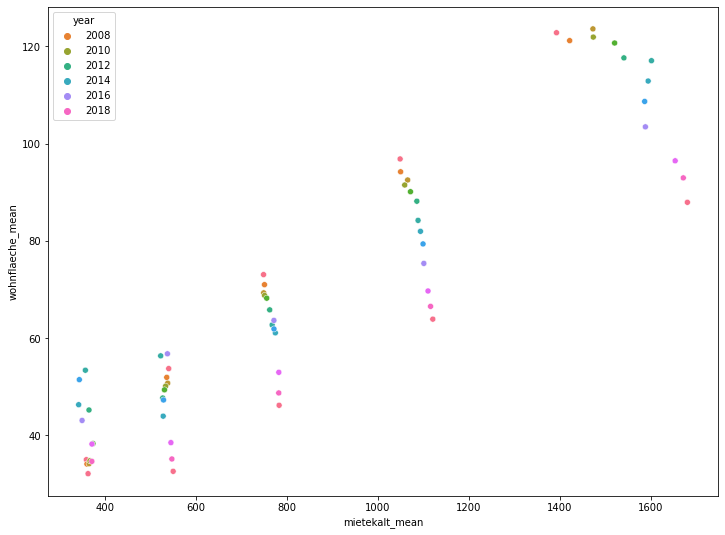

In [206]:
plt.figure(figsize=(12,9))


sns.scatterplot(data=summary.query('City == "München" '), x='mietekalt_mean', y='wohnflaeche_mean', hue='year', palette='husl')

In [178]:
berlin = summary.query('City == "Berlin"')

In [179]:
berlin.groupby(['year', 'label']).sum()

mietekalt_mean  wohnflaeche_mean  baujahr_mean  \
year label                                                              
2007 high priced          1038.719409        122.749451   1942.850525   
     low priced            495.304425         84.827695   1950.193002   
     normal priced         725.293180        104.759380   1943.819006   
     very high priced     1383.848407        134.177967   1945.309543   
     very low priced       305.871845         59.923220   1950.797217   
...                               ...               ...           ...   
2019 high priced          1084.248508         79.770352   1962.275865   
     low priced            521.962113         55.621573   1961.429146   
     normal priced         751.730493         65.766297   1960.392148   
     very high priced     1624.233389        105.375391   1964.662988   
     very low priced       351.383129         46.072773   1972.286594   

                       rent_sqm_mean  laufzeittage_mean  label_ratio  
year label                                                            
2007 high priced            8.611152          34.882601     0.023754  
     low priced             6.023987          37.428379     0.252804  
     normal priced          7.138539          35.244957     0.083539  
     very high priced      10.404585          40.175824     0.003651  
     very low priced        5.246541          32.301823     0.636252  
...                              ...                ...          ...  
2019 high priced           14.359058          25.911840     0.196846  
     low priced            10.229983          18.778993     0.261953  
     normal priced         12.112193          22.018659     0.253457  
     very high priced      15.968334          37.147484     0.149733  
     very low priced        8.004702           7.505009     0.138011  

[65 rows x 6 columns]

In [180]:
label_ratio = df.groupby(['City', 'year']).label.value_counts(normalize=True).reset_index(name='label_ratio')
city_count = df.groupby(['City', 'year']).label.value_counts(normalize=True).reset_index(name='label_ratio')

In [181]:
city_count.groupby(['City', 'year']).sum()

label_ratio
City      year             
Berlin    2007          1.0
          2008          1.0
          2009          1.0
          2010          1.0
          2011          1.0
...                     ...
Stuttgart 2015          1.0
          2016          1.0
          2017          1.0
          2018          1.0
          2019          1.0

[195 rows x 1 columns]

In [186]:
berlin = label_ratio.query('City == "Berlin"')

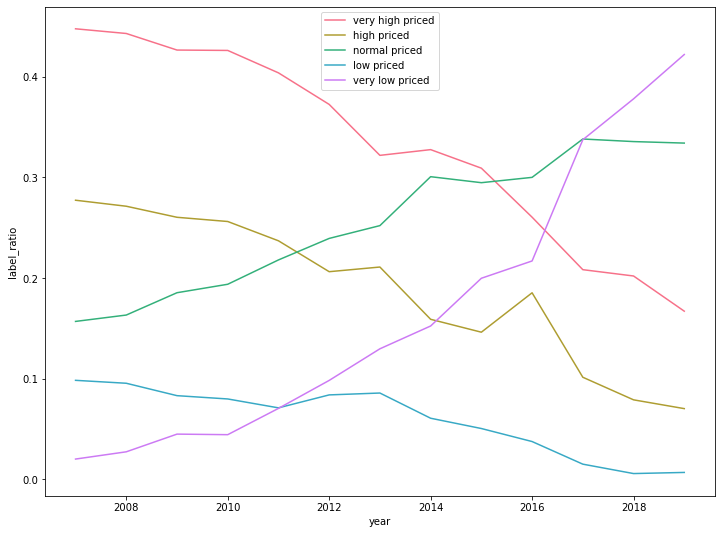

In [190]:
plt.figure(figsize=(12,9))
sns.lineplot(data=label_ratio.query('City == "München"'), x='year', y='label_ratio', hue='label', palette='husl')
plt.legend(labels=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'])

In [193]:
summary.head()

,City,year,label,mietekalt_mean,wohnflaeche_mean,baujahr_mean,rent_sqm_mean,laufzeittage_mean,label_ratio
0,Berlin,2007,high priced,1038.719409,122.749451,1942.850525,8.611152,34.882601,0.023754
1,Berlin,2007,low priced,495.304425,84.827695,1950.193002,6.023987,37.428379,0.252804
2,Berlin,2007,normal priced,725.293180,104.759380,1943.819006,7.138539,35.244957,0.083539
3,Berlin,2007,very high priced,1383.848407,134.177967,1945.309543,10.404585,40.175824,0.003651
4,Berlin,2007,very low priced,305.871845,59.923220,1950.797217,5.246541,32.301823,0.636252


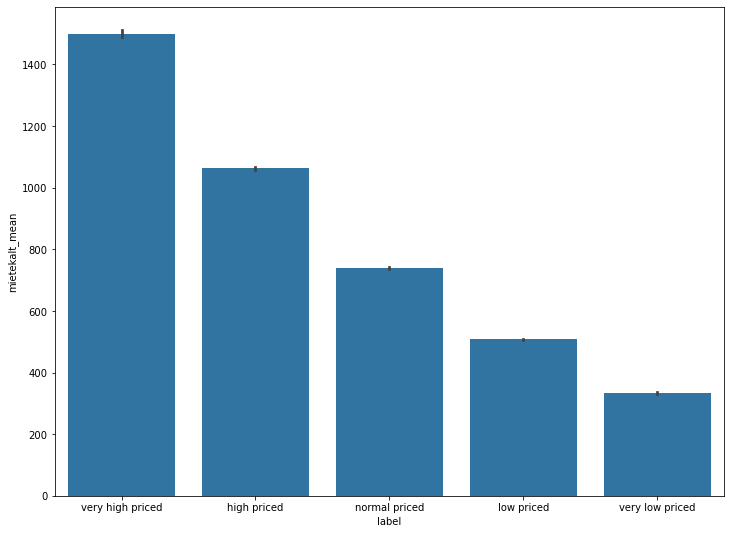

In [201]:
plt.figure(figsize=(12, 9))
sns.barplot(data=summary, x='label', y='mietekalt_mean', \
            order=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'], color=blue);


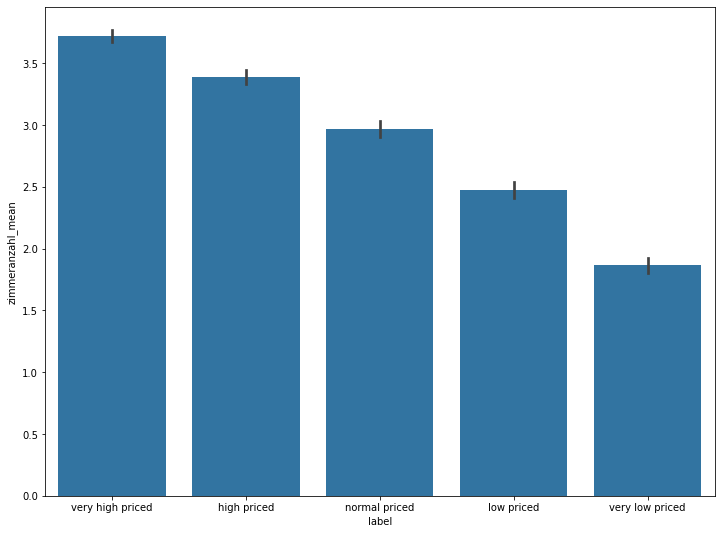

In [209]:
plt.figure(figsize=(12, 9))
sns.barplot(data=summary, x='label', y='zimmeranzahl_mean', \
            order=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'], color=blue);



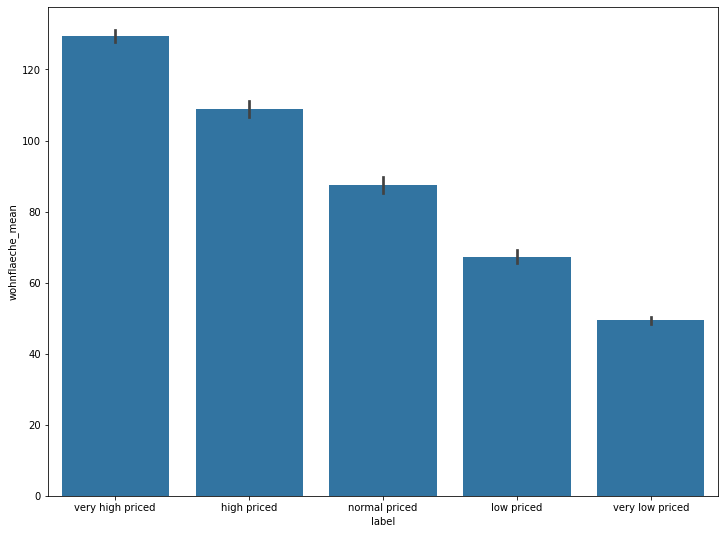

In [211]:
plt.figure(figsize=(12, 9))
sns.barplot(data=summary, x='label', y='wohnflaeche_mean', \
            order=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'], color=blue);



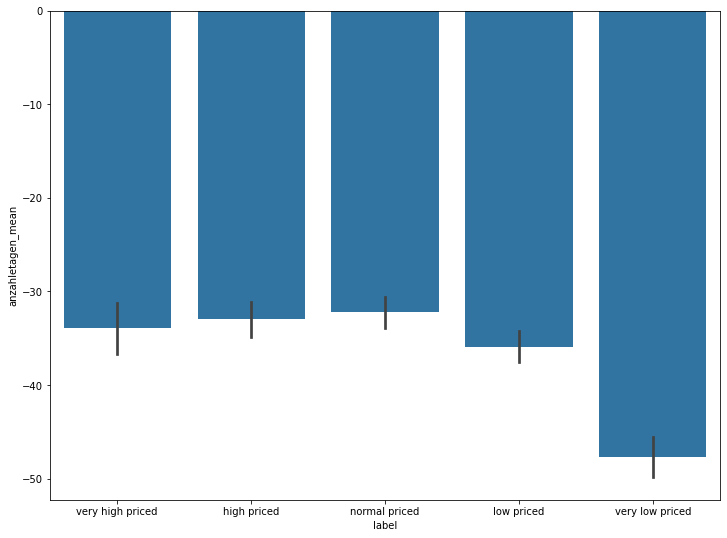

In [212]:
plt.figure(figsize=(12, 9))
sns.barplot(data=summary, x='label', y='anzahletagen_mean', \
            order=['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'], color=blue);



In [200]:
df.to_pickle('data/rent_clustering_done.pkl')